# Part 1: Real estate prices

Here is a CSV (comma-separated values) file listing real estate sales in
England between 1995 and 2016.(Actually, to make things a bit faster it's only a subset.)

Load the CSV file into Python. Use the Pandas function read_csv or use one of the techniques you
learned in the course Introduction to Data Science.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  # basic plotting library
import seaborn as sns  # additional plotting functions
import scipy
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans

url = 'http://www.cse.chalmers.se/~richajo/dit862/houses.csv'
data = pd.read_csv(url, header=None, usecols=[0, 1, 2, 13], names=['Id', 'price', 'date', 'location'])
data.head(10)

,Id,price,date,location
0,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07 00:00,DERBYSHIRE
1,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12 00:00,WEST MIDLANDS
2,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21 00:00,GREATER MANCHESTER
3,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31 00:00,SWINDON
4,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27 00:00,OXFORDSHIRE
5,{38531A9B-1D6A-466B-93AC-D91243B9A331},94500,1995-08-04 00:00,GLOUCESTERSHIRE
6,{23B6165E-6832-FCF4-E050-A8C0620577FA},228000,2015-09-02 00:00,KENT
7,{7287D8A8-3D64-491C-8F1B-F01B3881014D},370000,1999-09-20 00:00,GREATER LONDON
8,{249FEC23-25AA-45FB-BD8A-E4D8F12526FB},40500,1995-09-28 00:00,AVON
9,{21E5FEB7-4CB2-2439-E050-A8C06205342E},66050,2015-06-29 00:00,GREATER MANCHESTER


2)The second column in the CSV file represents the price of the property. Compute basic descriptive
statistics about the prices in the whole dataset: mean, median, standard deviation, minimum, and
maximum.

In [3]:
def header(msg):
    print('-' * 50)
    print(' [ ' + msg + ' ] ')


def value(msg, value):
    print(msg + ':', value)


# **************************************************************************
# Mean Calculation:
# **************************************************************************

header('Mean Calculation')
value('By DataFrame', data['price'].mean())
value('By NumPy', np.mean(data['price']))
# **************************************************************************
# Median Calculation:
# **************************************************************************

header('Median Calculation')
value('By DataFrame', data['price'].median())
value('By NumPy', np.median(data['price']))
value('By cipy', scipy.median(data['price']))

# **************************************************************************
# Standard Deviation Calculation:
# **************************************************************************

header('Standard Deviation Calculation')
value('By DataFrame', data['price'].std())
value('By NumPy', np.std(data['price']))
value('By cipy', scipy.std(data['price']))

# **************************************************************************
# Minimum Calculation:
# **************************************************************************

header('Minimum Calculation')
value('By DataFrame', data['price'].min())
value('By NumPy', np.min(data['price']))

# **************************************************************************
# Maximum Calculation:
# **************************************************************************

header('Maximum Calculation')
value('By DataFrame', data['price'].max())
value('By NumPy', np.max(data['price']))

# **************************************************************************
# Describe
# **************************************************************************
header('Describe Calculation')
data.describe()


--------------------------------------------------
 [ Mean Calculation ] 
By DataFrame: 174386.75374
By NumPy: 174386.75374
--------------------------------------------------
 [ Median Calculation ] 
By DataFrame: 129000.0
By NumPy: 129000.0
By cipy: 129000.0
--------------------------------------------------
 [ Standard Deviation Calculation ] 
By DataFrame: 351463.39776389604
By NumPy: 351461.6404425139
By cipy: 351461.6404425139
--------------------------------------------------
 [ Minimum Calculation ] 
By DataFrame: 150
By NumPy: 150
--------------------------------------------------
 [ Maximum Calculation ] 
By DataFrame: 48465717
By NumPy: 48465717
--------------------------------------------------
 [ Describe Calculation ] 


/home/aa100418/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
/home/aa100418/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead


,price
count,1.000000e+05
mean,1.743868e+05
std,3.514634e+05
min,1.500000e+02
25%,7.400000e+04
50%,1.290000e+05
75%,2.070000e+05
max,4.846572e+07


3)Plot a histogram that shows the distribution of the prices. Hint: why is it so ugly? W
hat can you do to make it more informative?

Ugly histogram
Here in this histogram the price range is very high and its frequency is not uniform .
Therefore all the frequencies are concentrated at one place due to non uniform distribution.

Text(0.5, 0, 'Price')

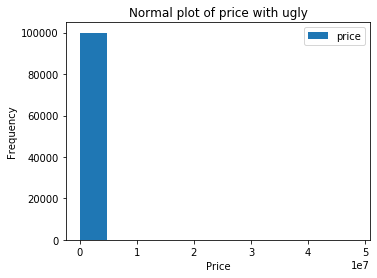

In [4]:
plt.figure(figsize=(12, 4));
ax1 = plt.subplot(121)
plt.title('Normal plot of price with ugly');
data.plot(kind='hist', ax=ax1);
plt.xlabel('Price')

Plot with 90 percentile of price data.
Since the price range is very high so we can not draw nice graph with entire data set.
That is the reason its looks ugly.
This graph I have taken the 90 percentile of price from minimum value of price.
Which clearly shows that after some price the number of sale decreased exponetially.

Text(0, 0.5, 'Frequency')

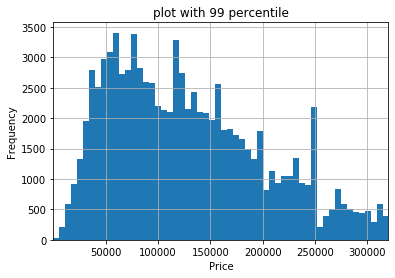

In [5]:
data.hist(alpha=1, bins='auto')
plt.xlim(np.min(data['price']), np.percentile(data['price'], 90))
plt.title('plot with 99 percentile');
plt.xlabel('Price')
plt.ylabel('Frequency')

inside london price range: price
(500.999, 72500.0]      1349
(72500.0, 109000.0]     1347
(109000.0, 142000.0]    1349
(142000.0, 175000.0]    1429
(175000.0, 209000.0]    1264
dtype: int64
outside london price range: price
(149.999, 43000.0]     8812
(43000.0, 59995.0]     8545
(59995.0, 79000.0]     8783
(79000.0, 98150.0]     8474
(98150.0, 121000.0]    8741
dtype: int64


Text(0, 0.5, 'Frequency')

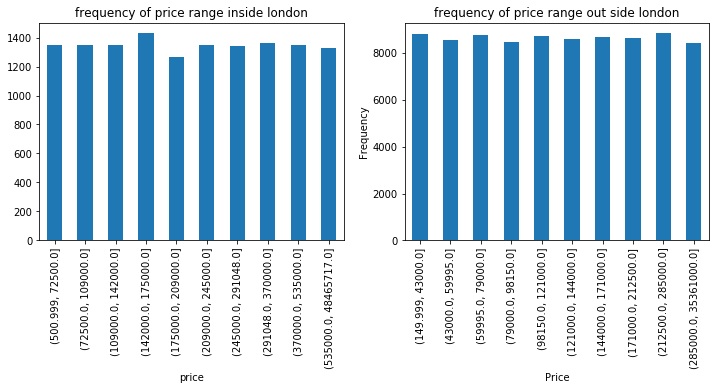

In [6]:
inside_london = data[data.loc[:, ('location')].str.contains("LONDON")]
price_rang_in_london = inside_london.groupby(pd.qcut(inside_london.loc[:, ('price')], 10)).size()
value('inside london price range', price_rang_in_london.head())
outside_london = data[~data.loc[:, ('location')].str.contains("LONDON")]
price_rang_out_london = outside_london.groupby(pd.qcut(outside_london.loc[:, ('price')], 10)).size()
value('outside london price range', price_rang_out_london.head())
plt.figure(figsize=(12, 4));

ax1 = plt.subplot(121)
plt.title('frequency of price range inside london');
price_rang_in_london.plot(kind='bar', ax=ax1);
ax2 = plt.subplot(122)
price_rang_out_london.plot(kind='bar', ax=ax2)
plt.title('frequency of price range out side london');
plt.xlabel('Price')
plt.ylabel('Frequency')

Is real estate more expensive in London? Plot histograms for the two subsets of properties inside and
outside London, respectively. For practical purposes, we can define "inside London" to mean that the
string in the 14th column (Python indexing column 13) includes the string LONDON.

Text(0, 0.5, 'Frequency')

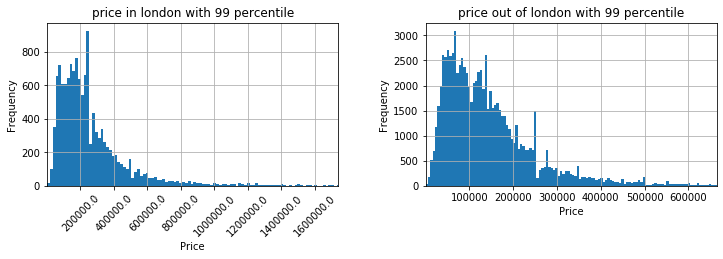

In [7]:
plt.figure(figsize=(12, 3));
ax3 = plt.subplot(121)
inside_london.hist(alpha=1, bins='auto', ax=ax3)
plt.xlim(np.min(inside_london.loc[:, ('price')]), np.percentile(inside_london.loc[:, ('price')], 99))
ax3.set_xticklabels(ax3.get_xticks(), rotation=45)
plt.title('price in london with 99 percentile');
plt.xlabel('Price')
plt.ylabel('Frequency')
ax4 = plt.subplot(122)
outside_london.hist(alpha=1, bins='auto', ax=ax4)
plt.xlim(np.min(outside_london.loc[:, ('price')]), np.percentile(outside_london.loc[:, ('price')], 99))
plt.title('price out of london with 99 percentile');
plt.xlabel('Price')
plt.ylabel('Frequency')

Average price per year in side london and out side london
This graph shows that the price increased inside and out side london consistentely.
But in recent year the average price decreased in london while out side london its consistentely increasing.

Optional task. Make a plot that shows the average price per year.Average price of house
per year in england The housing price in england consistentely increased but
in recent year the average housing price is decreasing.

            sum          mean      max
date                                  
1995  254430011  68598.007819   750000
1996  329248173  73166.260667   850000
1997  380068377  77312.525834   770000
1998  426286057  86292.724089  1500000
1999  520593122  95750.068420  2580000


Text(0, 0.5, 'Mean price')

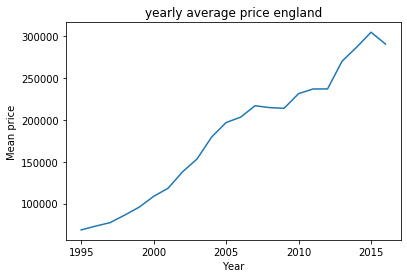

In [8]:
england = data
england['date'] = pd.to_datetime(england.date)
england = england.groupby(england['date'].dt.year)['price'].agg(['sum', 'mean', 'max'])
print(england.head())
plt.plot(england.index, england['mean']);
plt.title('yearly average price england');
plt.xlabel('Year')
plt.ylabel('Mean price')

